# Classify sign language alphabet using a convolutional neural network
This work is part of a collection of practice sets called [Deep Learning Starter](https://github.com/jamiemorales/project-deep-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the deep learning lifecycle early on.
After completion, someone will have built intuition over the deep learning lifecycle. 

## Step 0 Understand the problem
What we're trying to do here is classify sign language alphabets.

## Step 1: Set-up and understand data
In this step, we layout the tools we will need to solve the problem identified in the previous step. We want to inspect our data sources and explore the data itself to gain an understanding of the data for preprocessing and modeling.

In [1]:
# Set-up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Check source
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/sign-language-mnist/sign_mnist_train.csv
../input/sign-language-mnist/amer_sign3.png
../input/sign-language-mnist/american_sign_language.PNG
../input/sign-language-mnist/sign_mnist_test.csv
../input/sign-language-mnist/amer_sign2.png
../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [3]:
# Load data
train_images = pd.read_csv('../input/sign-language-mnist/sign_mnist_train.csv')
test_images = pd.read_csv('../input/sign-language-mnist/sign_mnist_test.csv')

train_labels = np.array(train_images['label'].values)
train_images = np.array(train_images.drop('label', axis=1).values)

test_labels = np.array(test_images['label'].values)
test_images = np.array(test_images.drop('label', axis=1).values)

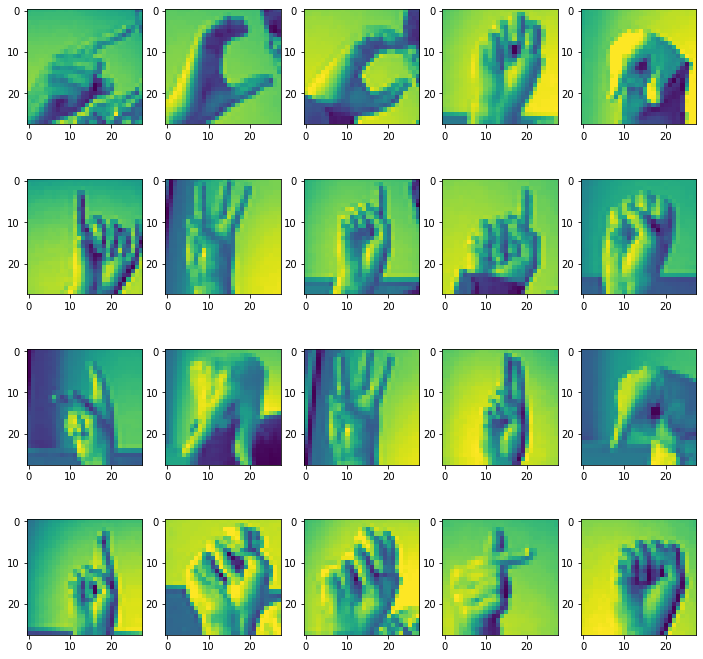

In [4]:
# Explore a few items
plt.figure(figsize=(12,12))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.imshow(train_images[i].reshape(28,28))

## Step 2: Prepare data and understand some more
In this step, we perform the necessary transformations on the data so that the neural network would be able to understand it. Real-world datasets are complex and messy. For our purposes, most of the datasets we work on in this series require minimal preparation.

In [5]:
# Reshape and normalise data
train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images / 255.0
train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)


test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images / 255.0
test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)


In [6]:
# Transform labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [7]:
# Explore data some more
print('Shape of training: ', train_images.shape)
print('Shape of training labels: ', train_images.shape)

print('Number of images: ', train_images_number)
print('Height of image: ', train_images_height)
print('Width of image: ', train_images_width)
print('Size of image: ', train_images_size)

print('\nShape of test: ', test_images.shape)
print('Shape of training labels: ', train_images.shape)

print('Number of images: ', test_images_number)
print('Height of image: ', test_images_height)
print('Width of image: ', test_images_width)
print('Size of image: ', test_images_size)

Shape of training:  (27455, 28, 28, 1)
Shape of training labels:  (27455, 28, 28, 1)
Number of images:  27455
Height of image:  28
Width of image:  28
Size of image:  784

Shape of test:  (7172, 28, 28, 1)
Shape of training labels:  (27455, 28, 28, 1)
Number of images:  7172
Height of image:  28
Width of image:  28
Size of image:  784


## Step 3: Build, train, and evaluate neural network
First, we design the neural network, e.g., sequence of layers and activation functions. 

Second, we train the neural network, we iteratively make a guess, calculate how accurate that guess is, and enhance our guess. The first guess is initialised with random values. The goodness or badness of the guess is measured with the loss function. The next guess is generated and enhanced by the optimizer function.

Lastly, use the neural network on previously unseen data and evaluate the results.

In [8]:
# Build and train neural network
model = tf.keras.Sequential([
    keras.layers.Conv2D(64, (8,8), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(24, activation='softmax')
])

# Compile neural network
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

# Train the neural network
model.fit(train_images, train_labels, epochs=5)

Train on 27455 samples
Epoch 1/5
27455/27455 [==============================] - 22s 801us/sample - loss: 2.7437 - accuracy: 0.1363
Epoch 2/5
27455/27455 [==============================] - 21s 771us/sample - loss: 2.2172 - accuracy: 0.2347
Epoch 3/5
27455/27455 [==============================] - 22s 799us/sample - loss: 1.9312 - accuracy: 0.3178
Epoch 4/5
27455/27455 [==============================] - 21s 767us/sample - loss: 1.6997 - accuracy: 0.4041
Epoch 5/5
27455/27455 [==============================] - 21s 765us/sample - loss: 1.5227 - accuracy: 0.4654


In [9]:
# Apply the neural network
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

7172/7172 [==============================] - 2s 258us/sample - loss: 2.0266 - accuracy: 0.3756
Test loss: 2.026620451375485, Test accuracy: 37.562742829322815


There's much to be improved but we'll leave it here for now and take this further in future examples.

## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [Datasets and sources](https://github.com/jamiemorales/project-deep-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/
